<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01: Neural Network Regression

In this notebook we're going to cover:
* Architecture of a neural network regression model
* The input shapes and output shapes of a regression mode (features and labels)
* Creating custom data to view and fit
* Steps in modeling: creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading models

# Creating Sample Regression Data

In [2]:
# import tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.8.0


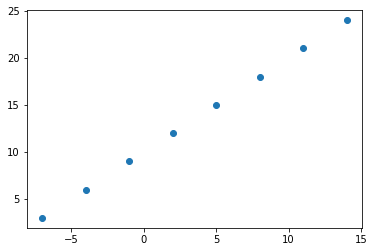

In [3]:
# create features & labels
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])
plt.scatter(X, y);

In [5]:
# turn data into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Steps in Modeling with TensorFlow

1. **Creating a model**: define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**: define the loss function (which tells our model how wrong it is), the optimizer (how to improve the pattern it is learning), and the evaluation metrics (how is our model performing).
3. **Fitting a model**: letting the model try to find patterns between X & y (features and labels).


In [6]:
# set random seed
tf.random.set_seed(42)

In [7]:
# use sample data to buiild, compile, and fit
tf.keras.backend.clear_session()

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_0.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_0.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5


2022-02-24 23:30:29.849926: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-24 23:30:30.219260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 16.4449 - mae: 16.4449
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 16.1637 - mae: 16.1637
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 15.8824 - mae: 15.8824
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 15.6012 - mae: 15.6012
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 15.3199 - mae: 15.3199


In [8]:
# try and make prediction (the right answer is 27)
y_pred = model_0.predict([17.0])
y_pred

2022-02-24 23:30:40.159734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[-7.4645805]], dtype=float32)

# Improving a TensorFlow Model

1. **When creating a model**: here we might add more **layers**, increase the number of **neurons**, change the **activation function** of each layer.
2. **When compiling a model**: here we might change the **optimizer**, change the **learning rate** of the optimizer.
3. **When fitting a model**: here we might fit a model for more **epochs**, or on more **data** to learn from.

In [9]:
# experiment 1: expand number of epochs
tf.keras.backend.clear_session()

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 127ms/step - loss: 12.5305 - mae: 12.5305
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3980 - mae: 12.3980
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.2655 - mae: 12.2655
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1330 - mae: 12.1330
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0005 - mae: 12.0005
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8680 - mae: 11.8680
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7355 - mae: 11.7355
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6030 - mae: 11.6030
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4705 - mae: 11.4705
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3380 - mae: 11.3380
Epoch 11/100
1/1 [==============================] - 0s 5m

2022-02-24 23:30:42.873105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 4ms/step - loss: 9.2180 - mae: 9.2180
Epoch 27/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0855 - mae: 9.0855
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9530 - mae: 8.9530
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 8.8205 - mae: 8.8205
Epoch 30/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6880 - mae: 8.6880
Epoch 31/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5555 - mae: 8.5555
Epoch 32/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4230 - mae: 8.4230
Epoch 33/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2905 - mae: 8.2905
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1580 - mae: 8.1580
Epoch 35/100
1/1 [==============================] - 0s 4ms/step - loss: 8.0255 - mae: 8.0255
Epoch 36/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8930 - ma

In [10]:
# now check the prediction (the right answer is 27)
y_pred = model_1.predict([17.])
y_pred

2022-02-24 23:30:49.049951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[29.956575]], dtype=float32)

In [11]:
# experiment 2: add a hidden layer
tf.keras.backend.clear_session()

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=1)

Epoch 1/100


2022-02-24 23:30:50.682153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 962ms/step - loss: 13.2622 - mae: 13.2622
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6058 - mae: 12.6058
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.9729 - mae: 11.9729
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3470 - mae: 11.3470
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7050 - mae: 10.7050
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0489 - mae: 10.0489
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3682 - mae: 9.3682
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6529 - mae: 8.6529
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8979 - mae: 7.8979
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0963 - mae: 7.0963
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 6.239

In [12]:
# now predict again (the right answer is 27)
y_pred = model_2.predict([17.])
y_pred

2022-02-24 23:30:59.509743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[31.930939]], dtype=float32)

In [13]:
# experiment 3: change the optimizer
tf.keras.backend.clear_session()

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=1)

Epoch 1/100


2022-02-24 23:31:47.232598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 619ms/step - loss: 13.6827 - mae: 13.6827
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.7656 - mae: 12.7656
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8528 - mae: 11.8528
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1072 - mae: 11.1072
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3870 - mae: 10.3870
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6707 - mae: 9.6707
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9450 - mae: 8.9450
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.2118 - mae: 8.2118
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4742 - mae: 7.4742
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7193 - mae: 6.7193
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 5.9392 

In [14]:
# now predict again (the right answer is 27)
y_pred = model_3.predict([17.])
y_pred

2022-02-24 23:31:52.922893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[26.935804]], dtype=float32)

# Evaluating a TensorFlow Model

* **Visualize the data**: what data are we working with? What does it look like?
* **Visualize the model**: what does the model look like?
* **Visualize the training**: how does the model perform while it learns?
* **Visualize the predictions**: how do the predictions line up against the ground truth?

In [15]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
y = X + 10 # formula we want the model to learn
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

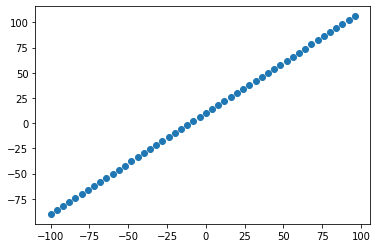

In [16]:
# visualize the data
plt.scatter(X, y)

In [17]:
# split X and y into training & test set
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

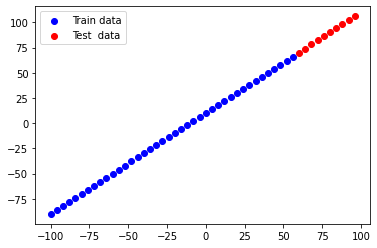

In [18]:
# visualize training & test data
plt.scatter(X_train, y_train, c='b', label='Train data')
plt.scatter(X_test, y_test, c='r', label='Test  data')
plt.legend()
plt.show()

In [19]:
# visualize the model
# must specfiy input shape in order to view model summary without fitting
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        100, activation='relu', input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_x")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

model.summary()

Model: "model_x"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [20]:
# fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

2022-02-24 23:32:05.025126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [21]:
# plot the layers
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [22]:
# visualize the training
y_pred = model.predict(X_test)
y_pred

2022-02-24 23:32:06.678675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[64.97073 ],
       [68.706894],
       [72.44307 ],
       [76.17923 ],
       [79.915405],
       [83.651566],
       [87.38774 ],
       [91.1239  ],
       [94.86007 ],
       [98.59624 ]], dtype=float32)

In [23]:
# create a plot function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.scatter(train_data, train_labels, c='b', label='Train data')
    plt.scatter(test_data, test_labels, c='g', label='Test  data')
    plt.scatter(test_data, predictions, c='r', label='predictions')
    plt.legend()
    plt.show()

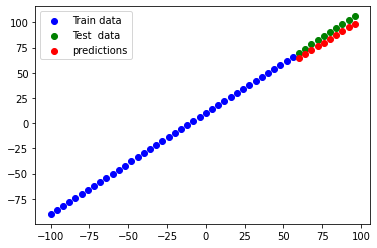

In [24]:
# plot prediction vs test and training datasets
plot_predictions()

In [25]:
# get evaluation
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 74ms/step - loss: 6.2165 - mae: 6.2165


2022-02-24 23:32:08.391189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[6.21651554107666, 6.21651554107666]

In [26]:
# calculate mae
tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=6.2165155>

In [27]:
# calculate mse
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=39.219326>

# Running Experiments to Improve Model

In [28]:
# make function to resue mae & mse
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true, tf.squeeze(y_pred)).numpy()

In [29]:
# reinstantiate models
tf.keras.backend.clear_session()

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

In [30]:
# refit different models
model_0.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=5, verbose=0)
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=0)

2022-02-24 23:32:14.185498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-24 23:32:14.361564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-24 23:32:15.219065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [31]:
# make preds
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

2022-02-24 23:32:19.066230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-24 23:32:19.101729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-24 23:32:19.136565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [32]:
# show results
model_results = pd.DataFrame([
    ["model_1", mae(y_test, y_pred_1), mse(y_test, y_pred_1)],
    ["model_2", mae(y_test, y_pred_2), mse(y_test, y_pred_2)],
    ["model_3", mae(y_test, y_pred_3), mse(y_test, y_pred_3)]
], columns=['model', 'mae', 'mse'])
model_results

,model,mae,mse
0,model_1,85.007591,7348.356934
1,model_2,3.546550,13.294672
2,model_3,1.430721,2.088419


# Save a TensorFlow Model

In [38]:
# save model in SavedModel format
model_3.save("best_model_SavedMolde_format")

INFO:tensorflow:Assets written to: best_model_SavedMolde_format/assets


In [39]:
# save model in HDF5 format
model_3.save("best_model_HDF5_format.h5")

In [40]:
# check local directory
!ls

best_model_HDF5_format.h5  best_model_SavedMolde_format  model.png  sample_data


# Load a TensorFlow Model

In [41]:
# load models
loaded_SavedModel_model = tf.keras.models.load_model(
    "/content/best_model_SavedMolde_format"
)

loaded_HDF5_model = tf.keras.models.load_model(
    "/content/best_model_HDF5_format.h5"
)

In [42]:
# view model
loaded_SavedModel_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [43]:
# view model
loaded_HDF5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [48]:
# compare model_3 prediction vs saved model predictions
model_3_preds = model_3.predict(X_test)
SavedModel_preds = loaded_SavedModel_model.predict(X_test)
HDF5_preds = loaded_HDF5_model.predict(X_test)

print(model_3_preds == SavedModel_preds)
print(model_3_preds == HDF5_preds)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [49]:
# check accuracy
print(mae(y_test, model_3_preds), mae(y_test, SavedModel_preds))
print(mae(y_test, model_3_preds), mae(y_test, HDF5_preds))

2.7679482 2.7679482
2.7679482 2.7679482


# Putting It All Together

In [52]:
# load an actual & larger dataset
insurance = pd.read_csv(
    "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
# one hot encode categorical data
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [61]:
# get X & Y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [63]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [71]:
# build and compile and fit model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

history = insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [72]:
# check the results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3294.3013 - mae: 3294.3013


[3294.30126953125, 3294.30126953125]

In [73]:
# check baseline
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

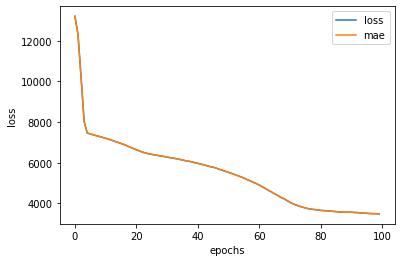

In [75]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

# Preprocessing Data with Feature Scaling